### Téléchargement des datas


In [4]:
""" plus besoin si on a les fichiers dans 'data'
import gdown
from os.path import exists

#Download the files only if they are not already in the environnement d'exécution

files_already_downloaded = exists('topics_linked.csv')

if not files_already_downloaded :

  #Import interventions.csv
  url = 'https://drive.google.com/uc?id=1e8J6m_HV66F_yHqjvzscePSLtvZi6YPB'
  output = 'interventions.csv'
  gdown.download(url, output, quiet=False)

  #Import Global_Mobility_Report.csv
  url = 'https://drive.google.com/uc?id=1GyWeePY8xG3G8DRlI0utcTsCmNCYjo3L'
  output = 'Global_Mobility_Report.csv'
  gdown.download(url, output, quiet=False)

  #Import Global_Mobility_Report.csv
  url = 'https://drive.google.com/uc?id=1GyWeePY8xG3G8DRlI0utcTsCmNCYjo3L'
  output = 'Global_Mobility_Report.csv'
  gdown.download(url, output, quiet=False)

  #Import apple mobility trends
  url = 'https://drive.google.com/uc?id=1Mg-1rxmnnPQIdWKsPWN9apH-y3P2x9dK'
  output = 'applemobilitytrends-2020-04-20.csv'
  gdown.download(url, output, quiet=False)

  #Import aggregated time series
  url = 'https://drive.google.com/uc?id=1lTjzeqc3wDQhcxG4VC9qtbw06vHED2eX'
  output = 'aggregated_timeseries.json'
  gdown.download(url, output, quiet=False)

  #Import topics_linked
  url = 'https://drive.google.com/uc?id=1Pv1EKCNR72Yxivrvn_KDj7vfr2vKEmfh'
  output = 'topics_linked.csv'
  gdown.download(url, output, quiet=False)

else :
  print ('Files already downloaded') """

" plus besoin si on a les fichiers dans 'data'\nimport gdown\nfrom os.path import exists\n\n#Download the files only if they are not already in the environnement d'exécution\n\nfiles_already_downloaded = exists('topics_linked.csv')\n\nif not files_already_downloaded :\n\n  #Import interventions.csv\n  url = 'https://drive.google.com/uc?id=1e8J6m_HV66F_yHqjvzscePSLtvZi6YPB'\n  output = 'interventions.csv'\n  gdown.download(url, output, quiet=False)\n\n  #Import Global_Mobility_Report.csv\n  url = 'https://drive.google.com/uc?id=1GyWeePY8xG3G8DRlI0utcTsCmNCYjo3L'\n  output = 'Global_Mobility_Report.csv'\n  gdown.download(url, output, quiet=False)\n\n  #Import Global_Mobility_Report.csv\n  url = 'https://drive.google.com/uc?id=1GyWeePY8xG3G8DRlI0utcTsCmNCYjo3L'\n  output = 'Global_Mobility_Report.csv'\n  gdown.download(url, output, quiet=False)\n\n  #Import apple mobility trends\n  url = 'https://drive.google.com/uc?id=1Mg-1rxmnnPQIdWKsPWN9apH-y3P2x9dK'\n  output = 'applemobilitytrends-20

### Load the different files

Here the .gz files have previously been uncompressed so that they are directly usable

In [2]:
import pandas as pd
import json

path = 'data/'

#Load csv files
df_interventions = pd.read_csv(path + 'interventions.csv')
df_google_mobility = pd.read_csv(path + 'Global_Mobility_Report.csv')
df_apple_mobility = pd.read_csv(path + 'applemobilitytrends-2020-04-20.csv')
df_topics_linked = pd.read_csv(path + 'topics_linked.csv')

#Load json file
f = open(path + 'aggregated_timeseries.json')
json_timeseries = json.load(f)
f.close()


/var/folders/k1/2j7pp08d18s0pl6k1zjtbxd40000gn/T/ipykernel_6086/1200487231.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_google_mobility = pd.read_csv(path + 'Global_Mobility_Report.csv')


In [3]:
#Print the columns of the dataframes
print (df_interventions.columns)
print (df_google_mobility.columns)
print (df_apple_mobility.columns)
print (df_topics_linked.columns)

#Print the keys of the json file
print (json_timeseries.keys())

Index(['lang', '1st case', '1st death', 'School closure',
       'Public events banned', 'Lockdown', 'Mobility', 'Normalcy'],
      dtype='object')
Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')
Index(['geo_type', 'region', 'transportation_type', '2020-01-13', '2020-01-14',
       '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
       ...
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20'],
      dtype='object', length=102)
I

## Study each dataframe

### Interventions dataframe

In [4]:
#Dataframe overview

df_interventions.head(3)

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10


In [5]:
#Countries considered in this dataset

print (df_interventions.shape[0], 'countries considered :')

for ctry in df_interventions['lang'] :
    print (ctry, end='  ')

13 countries considered :
fr  da  de  it  nl  no  sr  sv  ko  ca  fi  ja  en  

### Apple mobility report

In [6]:
#Dataframe overview

df_apple_mobility.head(3)

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67


In [7]:
#Min and max dates of this dataset

apple_cols = df_apple_mobility.columns
print ('Reference day :', apple_cols[3])
print ('Last day :', apple_cols[-1])

Reference day : 2020-01-13
Last day : 2020-04-20


In [8]:
#Regions considered

#Number of cities and country/region considered
print (df_apple_mobility['geo_type'].value_counts(), '\n')

#Regions considered
apple_regions = df_apple_mobility[df_apple_mobility['geo_type']=='country/region']['region']
print ('Regions : \n', apple_regions.unique(), '\n')

#Count the regions where the data is for walking, driving and transit
occurence_counting = apple_regions.value_counts()
print('Nb of regions with data for walking, driving and transit :', occurence_counting[occurence_counting==3].shape[0])
print('Nb of regions with data for only walking and driving :', occurence_counting[occurence_counting==2].shape[0], '\n')

#Cities considered
apple_cities = df_apple_mobility[df_apple_mobility['geo_type']=='city']['region']
print ('Cities : \n', apple_cities.unique(), '\n')

#Count the regions where the data is for walking, driving and transit
occurence_counting = apple_cities.value_counts()
print('Nb of cities with data for walking, driving and transit :', occurence_counting[occurence_counting==3].shape[0])
print('Nb of cities with data for only walking and driving :', occurence_counting[occurence_counting==2].shape[0], '\n')


city              242
country/region    153
Name: geo_type, dtype: int64 

Regions : 
 ['Albania' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria'
 'Cambodia' 'Canada' 'Chile' 'Colombia' 'Croatia' 'Czech Republic'
 'Denmark' 'Egypt' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Latvia' 'Lithuania' 'Luxembourg' 'Macao' 'Malaysia'
 'Mexico' 'Morocco' 'Netherlands' 'New Zealand' 'Norway' 'Philippines'
 'Poland' 'Portugal' 'Republic of Korea' 'Romania' 'Russia' 'Saudi Arabia'
 'Serbia' 'Singapore' 'Slovakia' 'Slovenia' 'South Africa' 'Spain'
 'Sweden' 'Switzerland' 'Taiwan' 'Thailand' 'Turkey' 'UK' 'United States'
 'Ukraine' 'United Arab Emirates' 'Uruguay' 'Vietnam'] 

Nb of regions with data for walking, driving and transit : 27
Nb of regions with data for only walking and driving : 36 

Cities : 
 ['Amsterdam' 'Athens' 'Atlanta' 'Auckland' 'Baltimore' 'Bangkok'
 'Barcelona' 'Berlin

/var/folders/k1/2j7pp08d18s0pl6k1zjtbxd40000gn/T/ipykernel_6086/3230671932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_walking.drop(['geo_type', 'region', 'transportation_type'], inplace=True, axis=1)


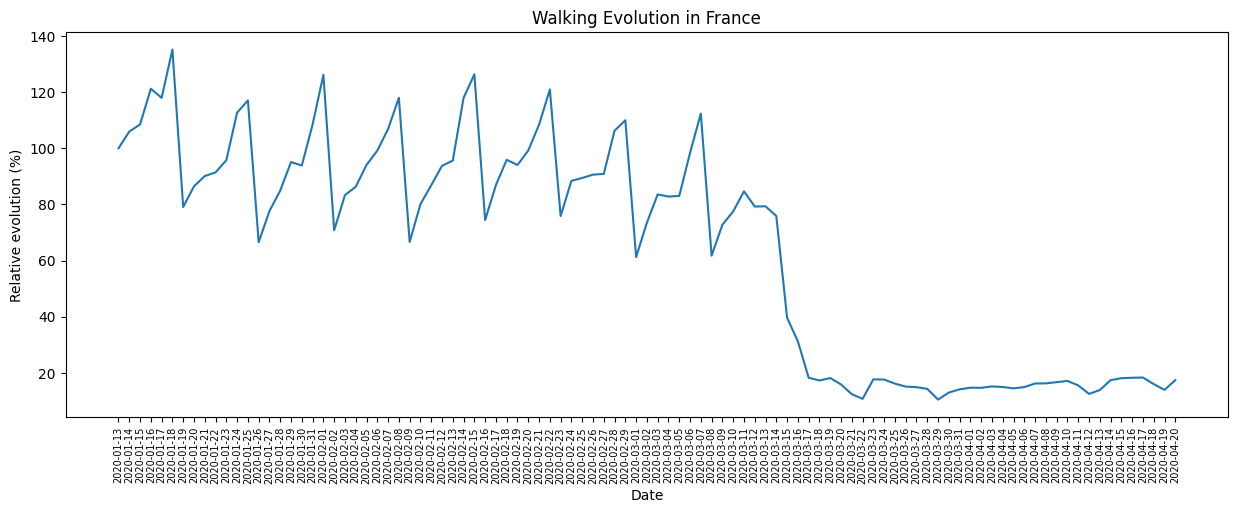

In [9]:
#Exemple : plot walking evolution in France

import matplotlib.pyplot as plt

#Extract walking data for France
france_walking = df_apple_mobility[(df_apple_mobility['region']=='France') & (df_apple_mobility['transportation_type']=='walking')]
france_walking.drop(['geo_type', 'region', 'transportation_type'], inplace=True, axis=1)

#Transpose it to have a pandas series and plot it
france_walking = france_walking.transpose()
fig = plt.figure(figsize=(15, 5))
plt.plot(france_walking)
plt.xticks(fontsize=7, rotation=90)
plt.title('Walking Evolution in France')
plt.xlabel('Date')
plt.ylabel('Relative evolution (%)')
plt.show()

### Google mobility report

In [10]:
#Overview of the dataset

df_google_mobility.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0


In [11]:
#Countries for which we have data
google_countries = df_google_mobility['country_region'].unique()
print ('Data for', google_countries.size, 'countries :')
print (google_countries)

Data for 135 countries :
['United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda' 'Angola'
 'Argentina' 'Austria' 'Australia' 'Aruba' 'Bosnia and Herzegovina'
 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso' 'Bulgaria' 'Bahrain'
 'Benin' 'Bolivia' 'Brazil' 'The Bahamas' 'Botswana' 'Belarus' 'Belize'
 'Canada' 'Switzerland' "Côte d'Ivoire" 'Chile' 'Cameroon' 'Colombia'
 'Costa Rica' 'Cape Verde' 'Czechia' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Estonia' 'Egypt' 'Spain' 'Finland' 'Fiji'
 'France' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Greece' 'Guatemala'
 'Guinea-Bissau' 'Hong Kong' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'Ireland' 'Israel' 'India' 'Iraq' 'Italy' 'Jamaica' 'Jordan'
 'Japan' 'Kenya' 'Kyrgyzstan' 'Cambodia' 'South Korea' 'Kuwait'
 'Kazakhstan' 'Laos' 'Lebanon' 'Liechtenstein' 'Sri Lanka' 'Lithuania'
 'Luxembourg' 'Latvia' 'Libya' 'Morocco' 'Moldova' 'North Macedonia'
 'Mali' 'Myanmar (Burma)' 'Mongolia' 'Malta' 'Mauritius' 'Mexico'
 'Malay

In [12]:
#The data can be at a more specific scale than the whole country
#For instance in France, the different regions are considered

google_mob_france = df_google_mobility[df_google_mobility['country_region'] == 'France']
print ('Regions considered in France')
print (google_mob_france['sub_region_1'].unique(), '\n')

#Let's now focus on Occitanie
print ('Subregions in Occitanie :')
google_mob_occ = google_mob_france[google_mob_france['sub_region_1'] == 'Occitanie']
print (google_mob_occ['sub_region_2'].unique())

#In occitanie let's focus on Haute-Garonne
google_mob_hg = google_mob_occ[google_mob_france['sub_region_2'] == 'Haute-Garonne']

Regions considered in France
[nan 'Auvergne-Rhône-Alpes' 'Bourgogne-Franche-Comté' 'Brittany'
 'Centre-Val de Loire' 'Corsica' 'Grand Est' 'Hauts-de-France'
 'Île-de-France' 'Normandy' 'Nouvelle-Aquitaine' 'Occitanie'
 'Pays de la Loire' "Provence-Alpes-Côte d'Azur"] 

Subregions in Occitanie :
[nan 'Ariege' 'Aude' 'Aveyron' 'Gard' 'Gers' 'Haute-Garonne'
 'Hautes-Pyrénées' 'Hérault' 'Lot' 'Lozère' 'Pyrénées-Orientales' 'Tarn'
 'Tarn-et-Garonne']


/var/folders/k1/2j7pp08d18s0pl6k1zjtbxd40000gn/T/ipykernel_6086/1814930784.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  google_mob_hg = google_mob_occ[google_mob_france['sub_region_2'] == 'Haute-Garonne']


In [13]:
#Now let's see what data can be extracted in Haute-Garonne
print ('Columns of the dataframe :')
print (google_mob_hg.columns, '\n')

#Focus on the date
print ('Date range : ')
print ('from', google_mob_hg['date'].iloc[0], 'to', google_mob_hg['date'].iloc[-1], '\n')

#Specific places for which we have data
print ('Types of places considered :')
for col in google_mob_hg.columns :
    if '_percent_change_from_baseline' in col :
        print(' -',col.replace('_percent_change_from_baseline', ''))


Columns of the dataframe :
Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object') 

Date range : 
from 2020-02-15 to 2020-08-25 

Types of places considered :
 - retail_and_recreation
 - grocery_and_pharmacy
 - parks
 - transit_stations
 - workplaces
 - residential


# Voyage Voyage

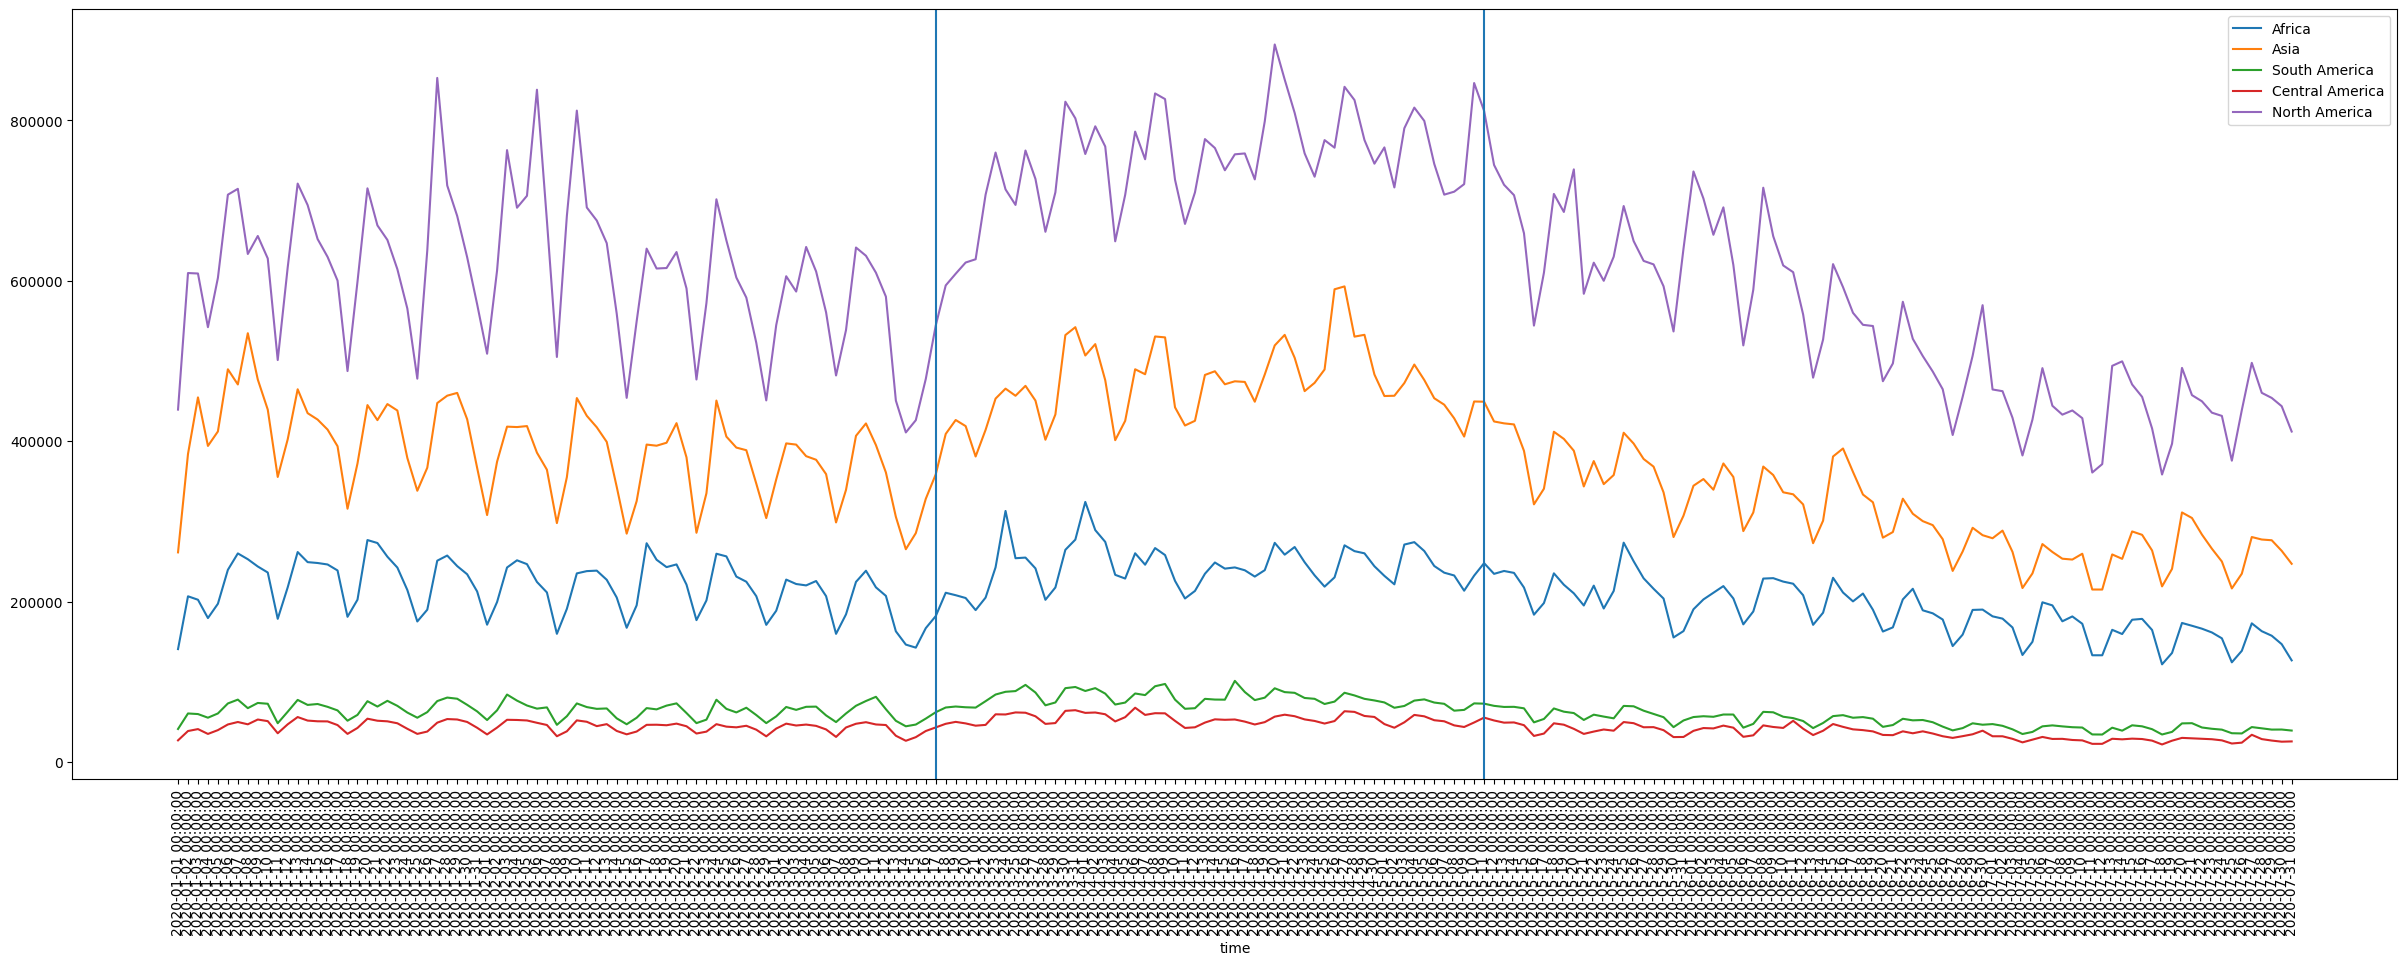

In [25]:
africa = list(json_timeseries['fr']['topics']['Geography.Regions.Africa.Africa*']['sum'].values())
asia = list(json_timeseries['fr']['topics']['Geography.Regions.Asia.Asia*']['sum'].values())
south_america = list(json_timeseries['fr']['topics']['Geography.Regions.Americas.South America']['sum'].values())
central_america = list(json_timeseries['fr']['topics']['Geography.Regions.Americas.Central America']['sum'].values())
north_america = list(json_timeseries['fr']['topics']['Geography.Regions.Americas.North America']['sum'].values())

time = list(json_timeseries['fr']['topics']['Geography.Regions.Africa.Africa*']['sum'].keys())

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.plot(time[730:],africa[730:],label='Africa')
plt.plot(asia[730:],label='Asia')
plt.plot(south_america[730:],label='South America')
plt.plot(central_america[730:],label='Central America')
plt.plot(north_america[730:],label='North America')
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('time')
plt.axvline(x=806-730)
plt.axvline(x=861-730)

plt.legend()

In [26]:
print(africa.index(max(africa)))
print(asia.index(max(asia)))
print(north_america.index(max(north_america)))

print(time.index('2020-03-17 00:00:00'))
print(time.index('2020-05-11 00:00:00'))

print(time)


319
319
319
806
861
['2018-01-01 00:00:00', '2018-01-02 00:00:00', '2018-01-03 00:00:00', '2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00', '2018-01-07 00:00:00', '2018-01-08 00:00:00', '2018-01-09 00:00:00', '2018-01-10 00:00:00', '2018-01-11 00:00:00', '2018-01-12 00:00:00', '2018-01-13 00:00:00', '2018-01-14 00:00:00', '2018-01-15 00:00:00', '2018-01-16 00:00:00', '2018-01-17 00:00:00', '2018-01-18 00:00:00', '2018-01-19 00:00:00', '2018-01-20 00:00:00', '2018-01-21 00:00:00', '2018-01-22 00:00:00', '2018-01-23 00:00:00', '2018-01-24 00:00:00', '2018-01-25 00:00:00', '2018-01-26 00:00:00', '2018-01-27 00:00:00', '2018-01-28 00:00:00', '2018-01-29 00:00:00', '2018-01-30 00:00:00', '2018-01-31 00:00:00', '2018-02-01 00:00:00', '2018-02-02 00:00:00', '2018-02-03 00:00:00', '2018-02-04 00:00:00', '2018-02-05 00:00:00', '2018-02-06 00:00:00', '2018-02-07 00:00:00', '2018-02-08 00:00:00', '2018-02-09 00:00:00', '2018-02-10 00:00:00', '2018-02-11 00:00:00', '2018-02-12 0